### Author : Samruddhi Randive
## Task 3 : Exploratory Data Analysis - Retail
GRIP @ The Sparks Foundation
In this  task  as a business manager,I tried to find out the weak areas where I can
work to make more profit.

Technical Stack : Seaborn, Numpy Array, Pandas, Matplotlib

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [7]:
df.shape

(9994, 13)

In [8]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

### Exploratory Data Analysis

C:\Users\CC132\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\CC132\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


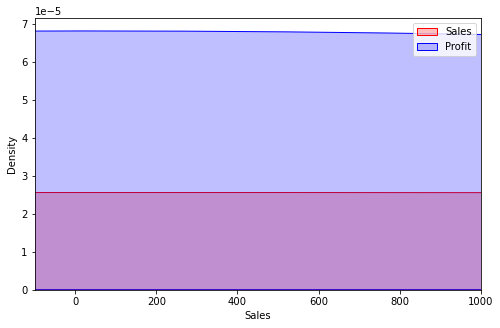

In [58]:
plt.figure(figsize=(8,5))
sns.kdeplot(df['Sales'],color='red',label='Sales',shade=True,bw=25)
sns.kdeplot(df['Profit'],color='Blue',label='Profit',shade=True,bw=25)
plt.xlim([-100,1000])
plt.legend()


Profit is more than that of sale but there are some areas where profit could be increased.

### Analysis using Pairplot of each column

#### [1] Based on the Catagory

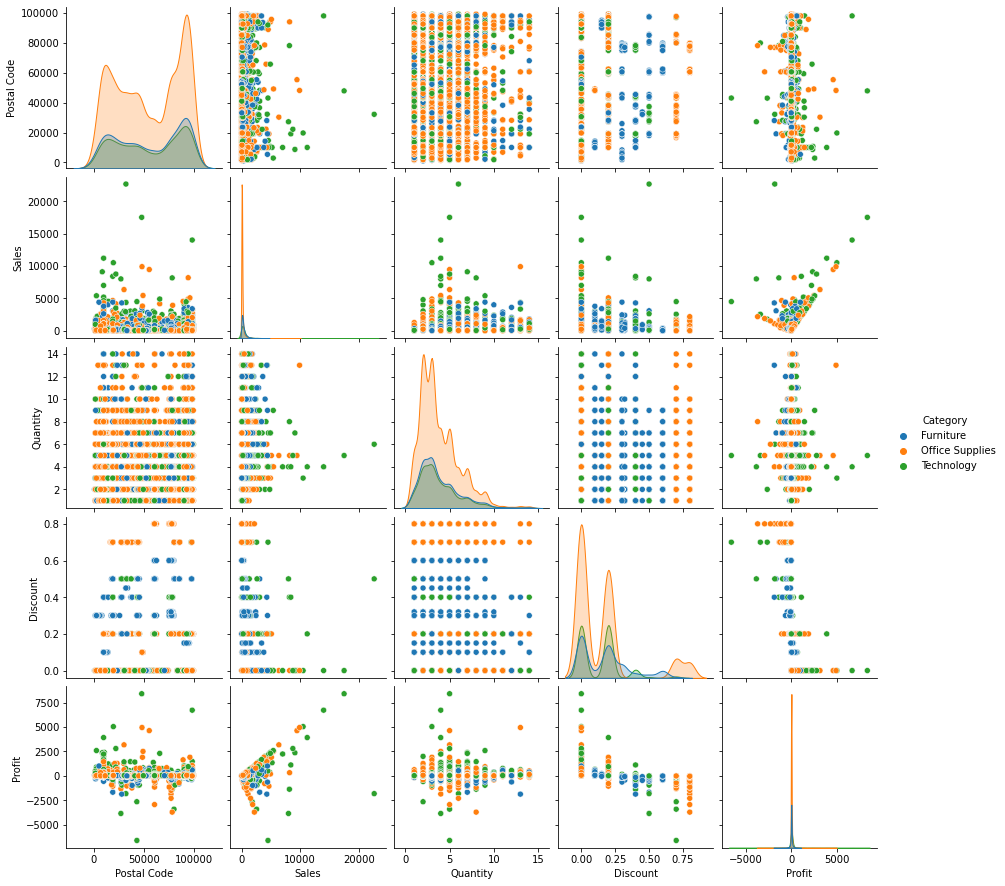

In [10]:
sns.pairplot(df,hue='Category')

#### [2] Based on Region

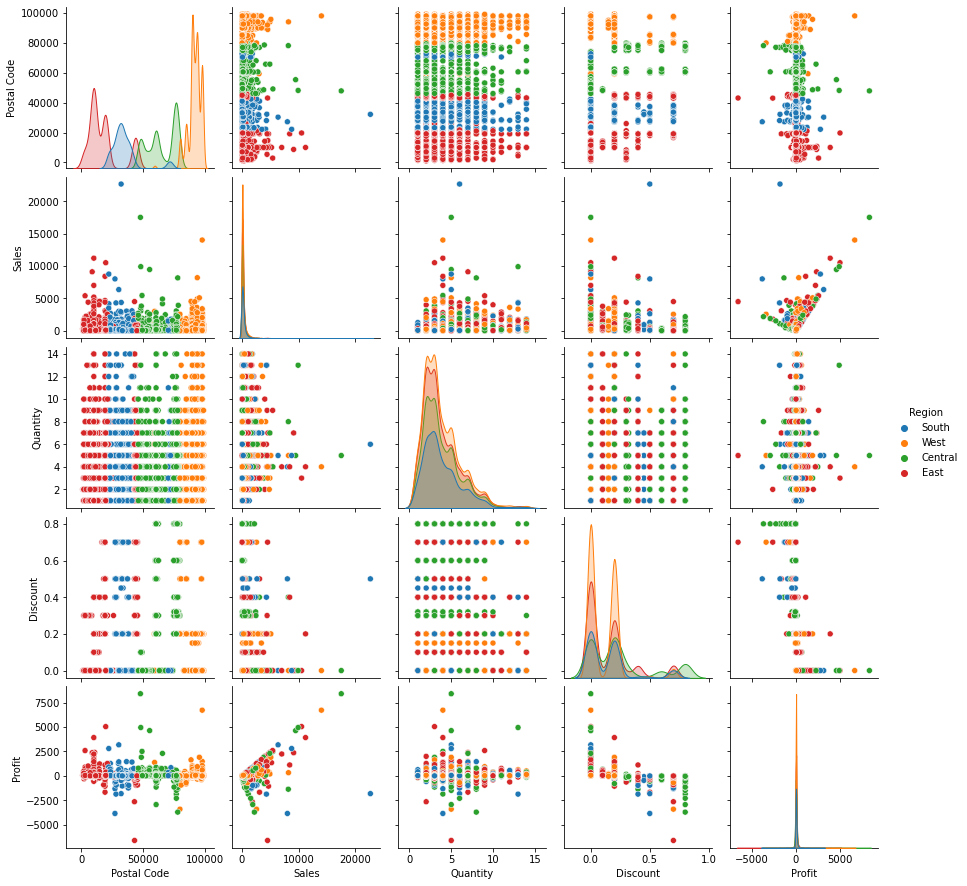

In [11]:
sns.pairplot(df,hue='Region')

#### [3] Based on the segment

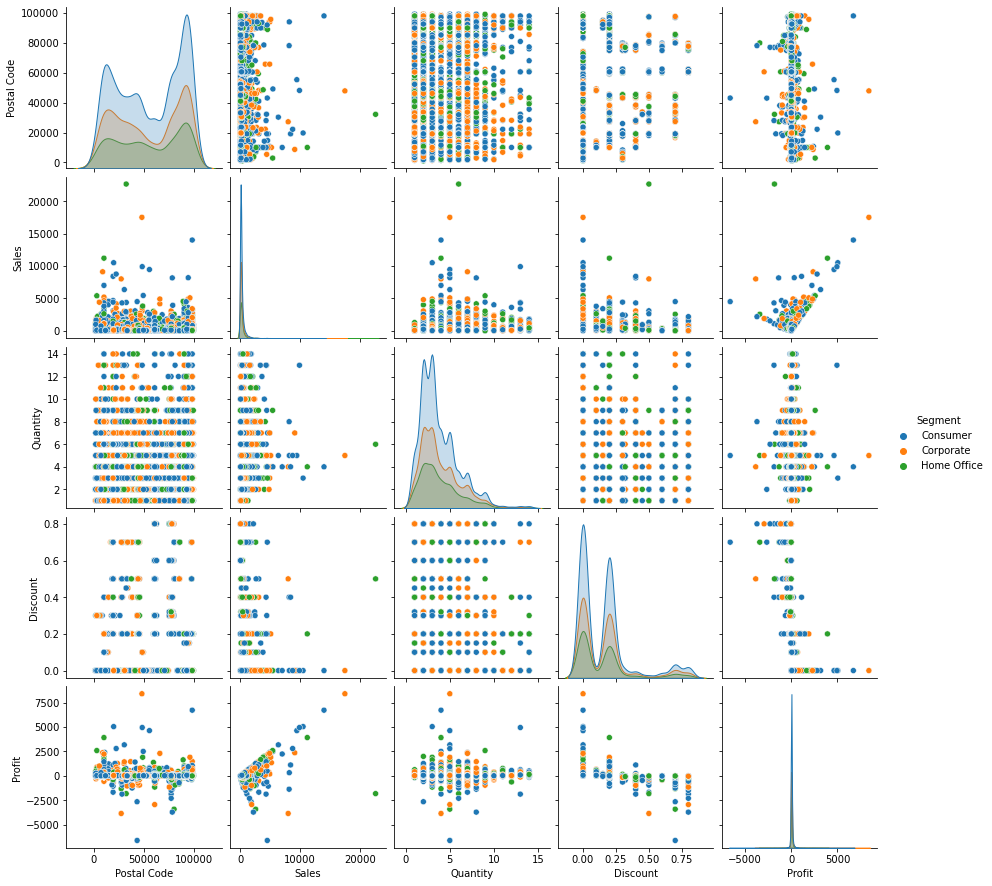

In [12]:
sns.pairplot(df,hue='Segment')

In [13]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


### Heatmap for Correlation

<AxesSubplot:>

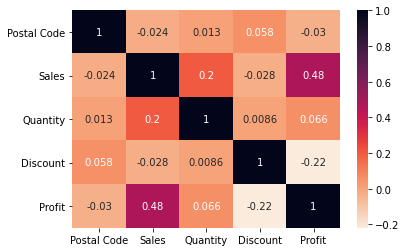

In [14]:
sns.heatmap(df.corr(),cmap='rocket_r',annot=True)

From above Heatmap:

1. Sales and Profit are Moderately Correlated.
1. Discount and Profit are Negatively Correlated
1. Quantity and Profit are less Moderately Correlated.

### Count plot of each column

C:\Users\CC132\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\CC132\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\CC132\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\CC132\anaconda3\lib\si

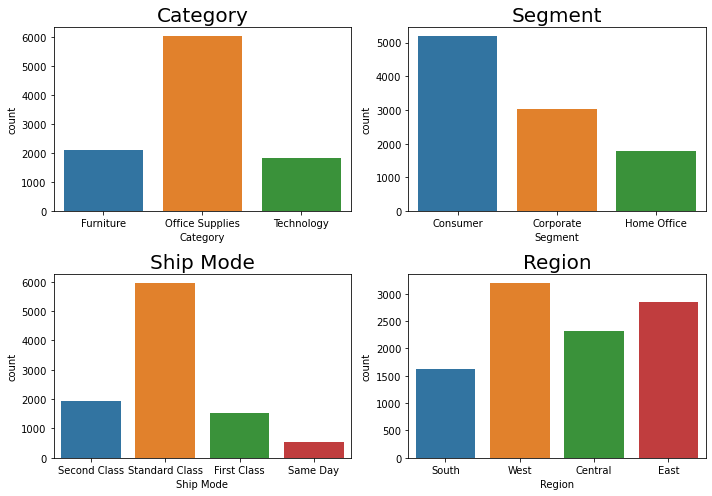

In [15]:
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(10,7));

sns.countplot(df['Category'],ax=axs[0][0])
sns.countplot(df['Segment'],ax=axs[0][1])
sns.countplot(df['Ship Mode'],ax=axs[1][0])
sns.countplot(df['Region'],ax=axs[1][1])
axs[0][0].set_title('Category',fontsize=20)
axs[0][1].set_title('Segment',fontsize=20)
axs[1][0].set_title('Ship Mode',fontsize=20)
axs[1][1].set_title('Region',fontsize=20)


plt.tight_layout()

C:\Users\CC132\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Sub-Category')

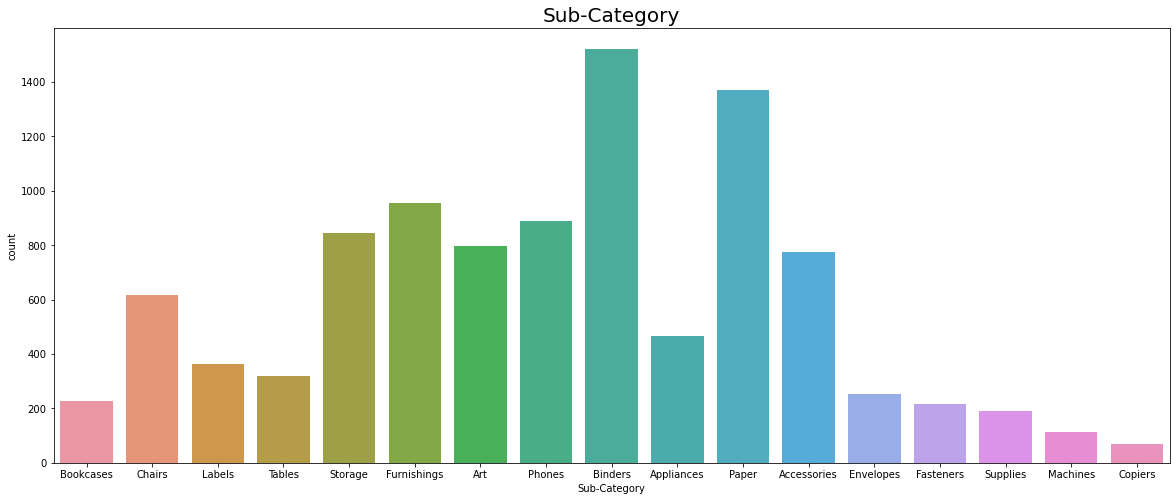

In [16]:
plt.figure(figsize=(20,8))
sns.countplot(df['Sub-Category'])
plt.title('Sub-Category',fontsize=20)

C:\Users\CC132\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Sub-Category')

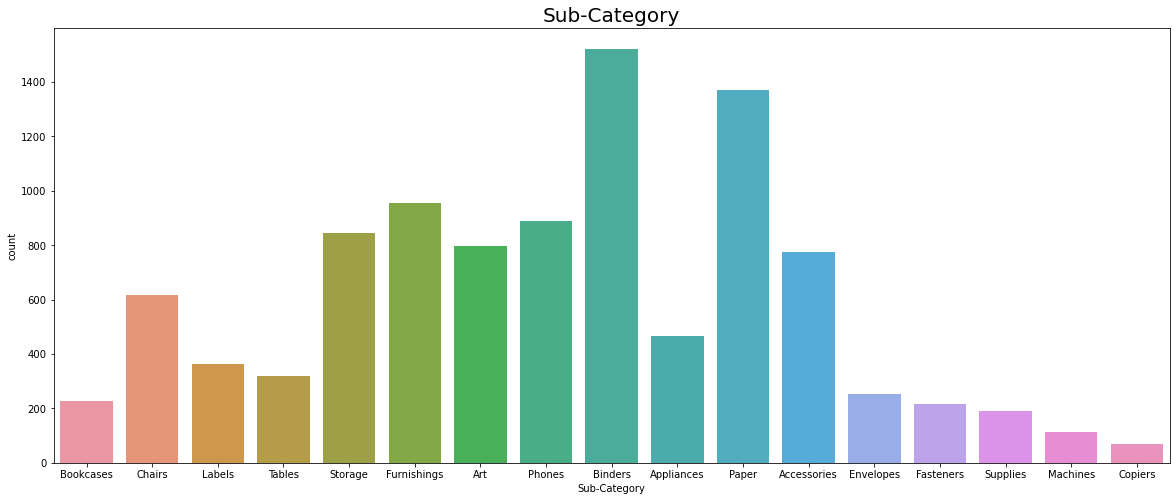

In [17]:
plt.figure(figsize=(20,8))
sns.countplot(df['Sub-Category'])
plt.title('Sub-Category',fontsize=20)

C:\Users\CC132\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'State')

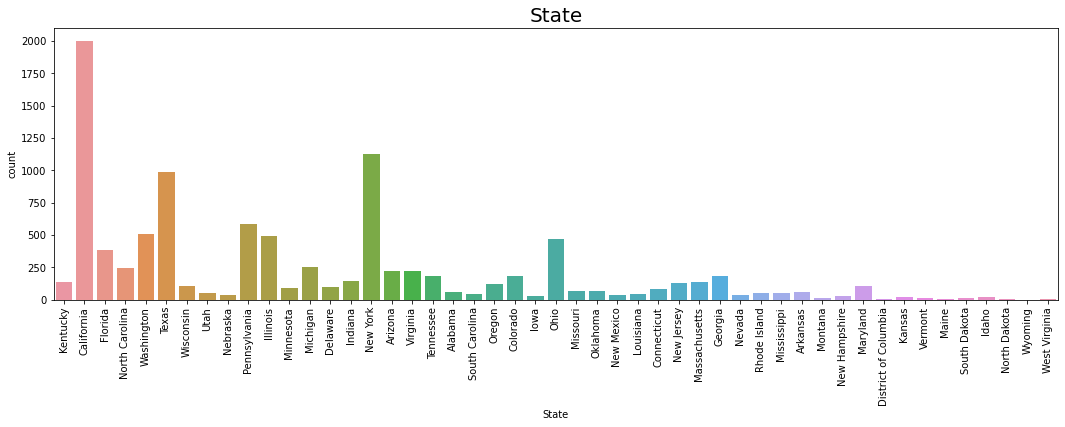

In [18]:
plt.figure(figsize=(18,5))
sns.countplot(df['State'])
plt.xticks(rotation=90)
plt.title('State',fontsize=20)

C:\Users\CC132\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Quantity')

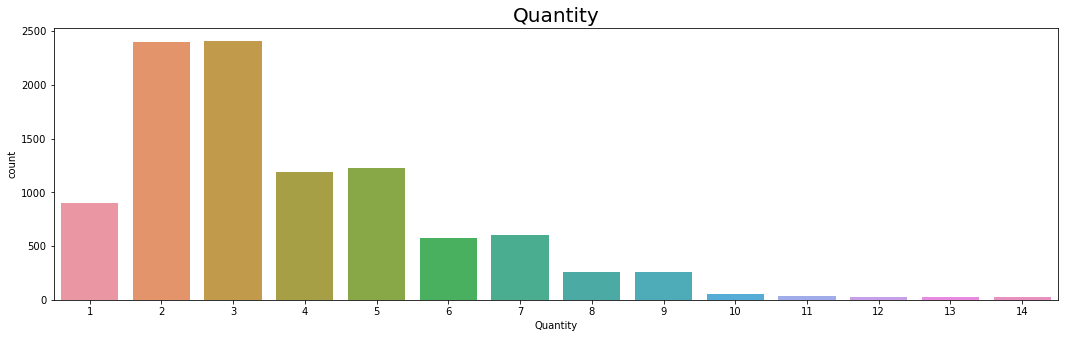

In [20]:
plt.figure(figsize=(18,5))
sns.countplot(df['Quantity'])
plt.title('Quantity',fontsize=20)

C:\Users\CC132\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Discount')

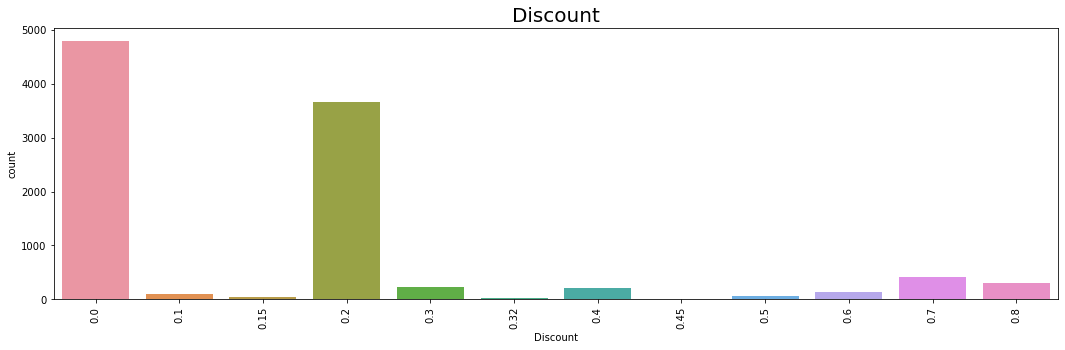

In [21]:
plt.figure(figsize=(18,5))
sns.countplot(df['Discount'])
plt.xticks(rotation=90)
plt.title('Discount',fontsize=20)

### Distribution of the data using the plot


C:\Users\CC132\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\CC132\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\CC132\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

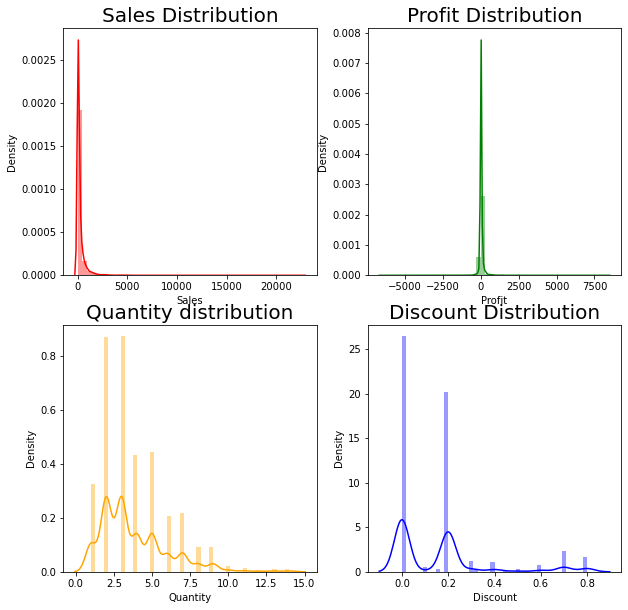

In [22]:
fig, axs = plt.subplots(ncols=2, nrows = 2, figsize = (10,10))
sns.distplot(df['Sales'], color = 'red',  ax = axs[0][0])
sns.distplot(df['Profit'], color = 'green',  ax = axs[0][1])
sns.distplot(df['Quantity'], color = 'orange',  ax = axs[1][0])
sns.distplot(df['Discount'], color = 'blue',  ax = axs[1][1])
axs[0][0].set_title('Sales Distribution', fontsize = 20)
axs[0][1].set_title('Profit Distribution', fontsize = 20)
axs[1][0].set_title('Quantity distribution', fontsize = 20)
axs[1][1].set_title('Discount Distribution', fontsize = 20)
plt.show()

### Statewise Deal Analysis

In [23]:
df['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [24]:
df1 = df['State'].value_counts()
df1.head(10)

California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Name: State, dtype: int64

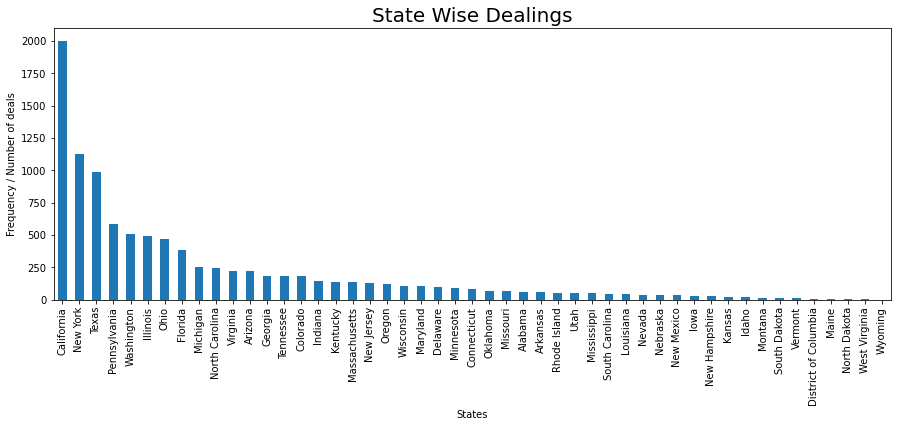

In [25]:
df1.plot(kind='bar',figsize=(15,5))
plt.ylabel('Frequency / Number of deals')
plt.xlabel('States')

plt.title('State Wise Dealings', fontsize = 20)
plt.show()

1. Here is top 3 state where deals are Highest.
* Califonia
* New York
* Texas

### Wyoming: Lowest Number of deal

In [26]:
df['State'].value_counts().mean()

203.9591836734694

Average number of deal per state is 204.

### City Wise analysis of the dealing

In [27]:
df2 = df['City'].value_counts()
df2=df2.head(50)

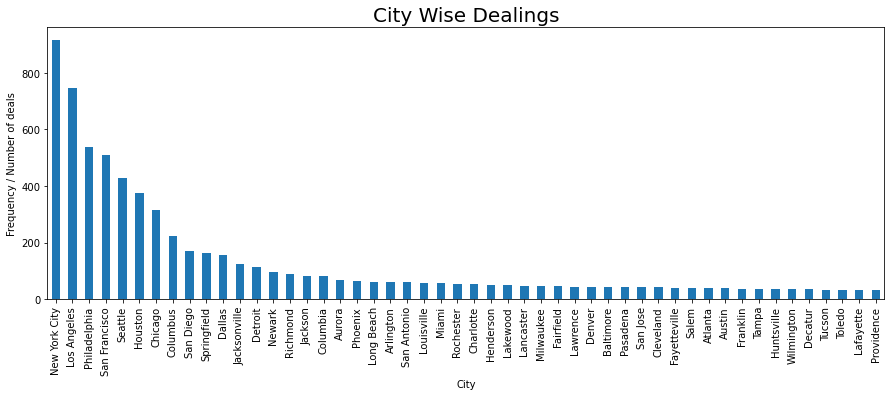

In [28]:
df2.plot(kind='bar',figsize=(15,5))
plt.ylabel('Frequency / Number of deals')
plt.xlabel('City')

plt.title('City Wise Dealings', fontsize = 20)
plt.show()


Here is top 3 city where deals are Highest.

1. New York City
2. Los Angeles
3. Philadelphia

In [29]:
df['City'].value_counts().mean()

18.821092278719398

Average number of deal per city is 19.

### Segment wise analysis of Profit, Discount and sell

In [30]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [31]:
df_segment= df.groupby(['Segment'])[['Sales', 'Discount', 'Profit']].mean()
df_segment

,Sales,Discount,Profit
Segment,,,
Consumer,223.733644,0.158141,25.836873
Corporate,233.823300,0.158228,30.456667
Home Office,240.972041,0.147128,33.818664


C:\Users\CC132\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


Text(0.5, 1.0, 'Segment wise analysis of Sale, Discount, profit')

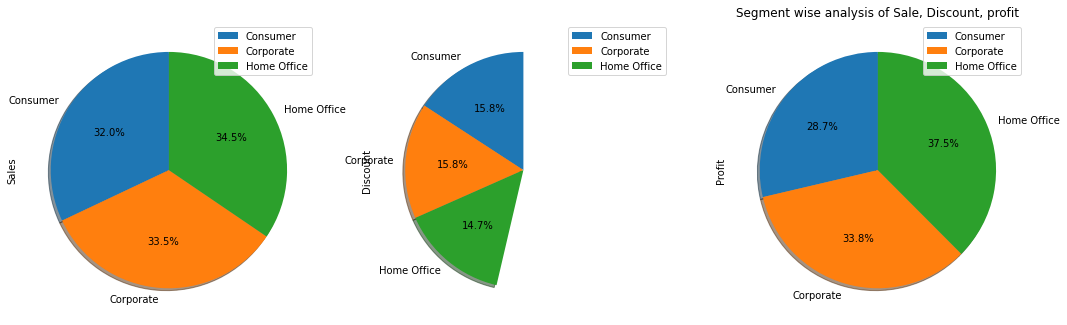

In [32]:
#1. sales 2. Discount 3. Profit
df_segment.plot.pie(subplots=True, 
                    autopct='%1.1f%%',
                    figsize=(18, 20),
                    startangle=90,     # start angle 90° (Africa)
                    shadow=True,
                    labels = df_segment.index)
plt.title('Segment wise analysis of Sale, Discount, profit')

#### Sales :

Consumer : 32%

Corporate - 33.5%

Home Office : 34.5%


#### Discount :

Consumer : 15.8%

Corporate : 15.8

Home Office : 14.7%


#### Profit :

Consumer : 15.8%

Corporate : 15.8%

Home Office : 14.7%


### Statewise analysis of Profit Discount and sell


In [33]:
df['State'].value_counts().head(10)

California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Name: State, dtype: int64

In [34]:
df_state= df.groupby(['State'])[['Sales', 'Discount', 'Profit']].mean()
df_state.head(10)

,Sales,Discount,Profit
State,,,
Alabama,319.846557,0.000000,94.865989
Arizona,157.508933,0.303571,-15.303235
Arkansas,194.635500,0.000000,66.811452
California,228.729451,0.072764,38.171608
Colorado,176.418231,0.316484,-35.867351
Connecticut,163.223866,0.007317,42.823071
Delaware,285.948635,0.006250,103.930988
District of Columbia,286.502000,0.000000,105.958930
Florida,233.612815,0.299347,-8.875461


#### [1] Statewise Profit Analysis

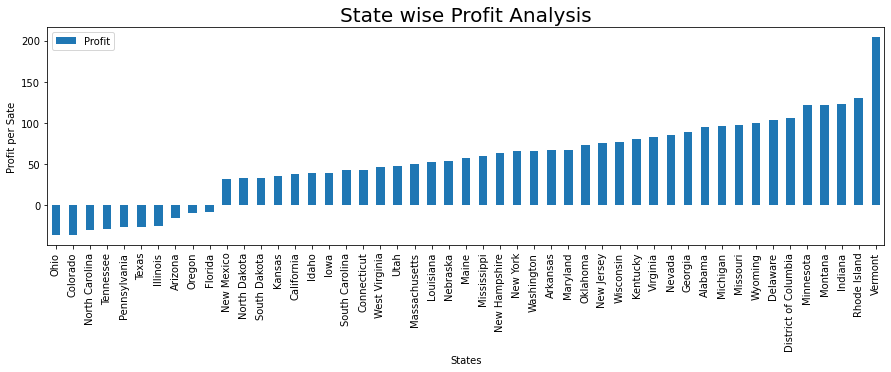

In [35]:
df_state1=df_state.sort_values('Profit')

df_state1[['Profit']].plot(kind = 'bar', figsize = (15,4))
plt.title('State wise Profit Analysis', fontsize = 20)
plt.ylabel('Profit per Sate')
plt.xlabel('States')
plt.show()


#### RESULT :

Vermont: Highest Profit

Ohio: Lowest Profit


#### [2] Statewise Sale Analysis

Text(0.5, 1.0, 'State wise analysis of Sale')

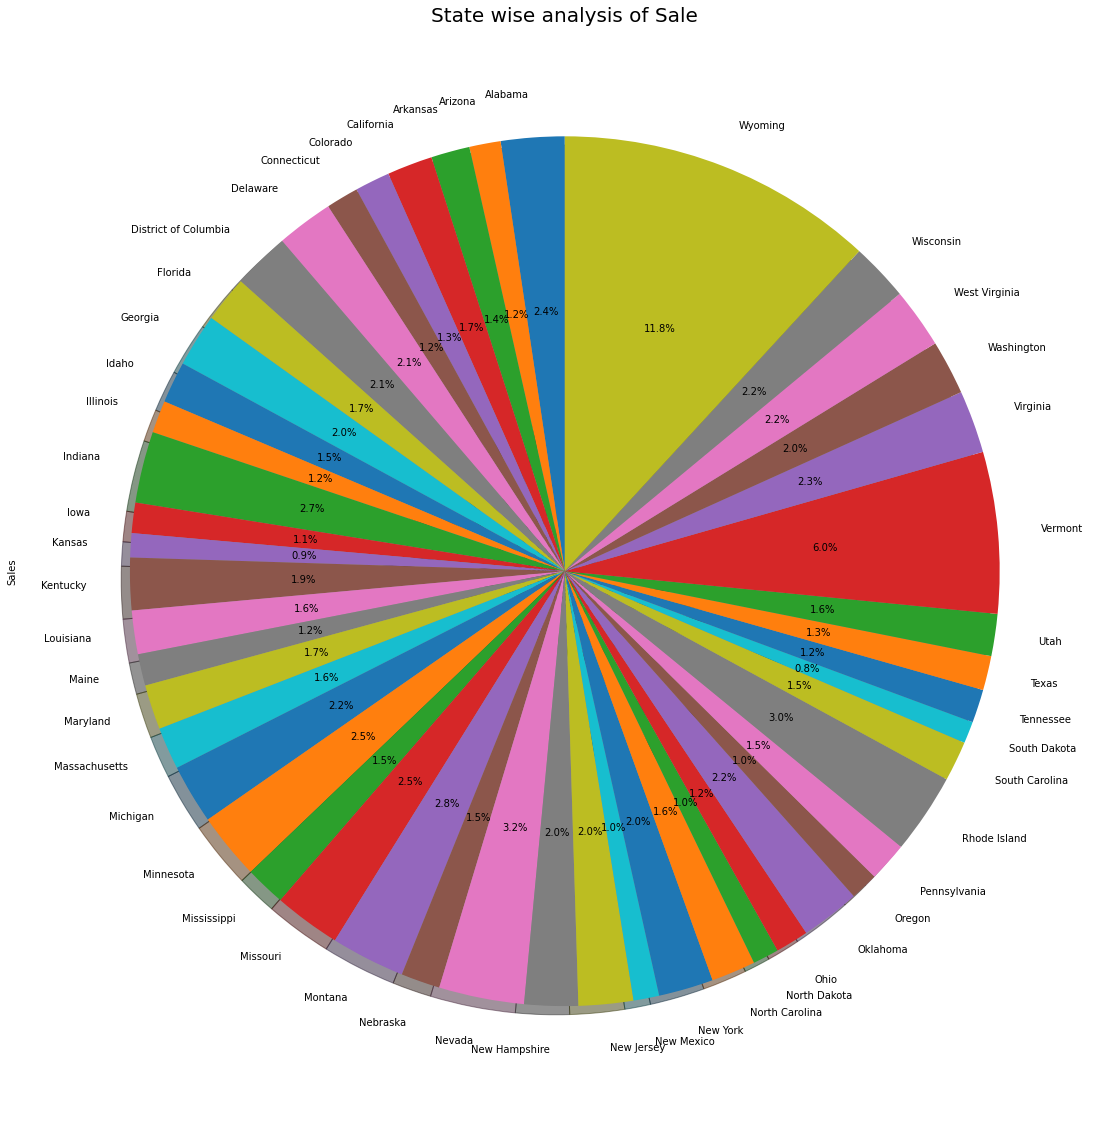

In [36]:
df_state['Sales'].plot(kind='pie',
                        figsize = (20,20),
                        autopct='%1.1f%%',
                        startangle=90,     # start angle 90° (Africa)
                        shadow=True)
plt.title('State wise analysis of Sale',fontsize=20)

* Highest amount of sales= **Wyoming(11.8%)**
* Lowest amount of sales= **South Dakota(0.8%)**


#### [3] Statewise Discount Analysis

Text(0.5, 1.0, 'State wise analysis of Discount')

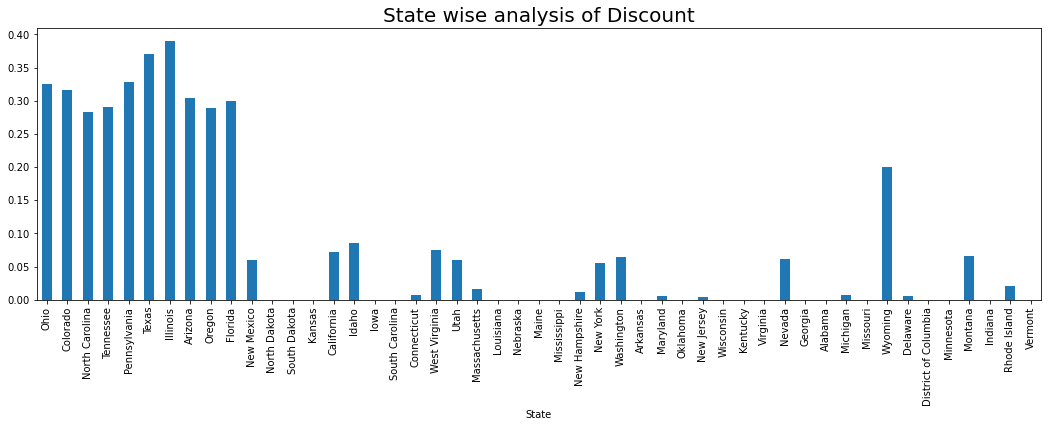

In [37]:
df_state1['Discount'].plot(kind='bar',figsize=(18,5))
plt.title('State wise analysis of Discount', fontsize=20)


**Illinois at the top**


### Citywise Analysis of the Profit

In [38]:
df_city= df.groupby(['City'])[['Sales', 'Discount', 'Profit']].mean()
df_city = df_city.sort_values('Profit')
df_city.head()

,Sales,Discount,Profit
City,,,
Bethlehem,337.926800,0.380000,-200.619160
Champaign,151.960000,0.600000,-182.352000
Oswego,107.326000,0.600000,-178.709200
Round Rock,693.436114,0.274286,-169.061614
Lancaster,215.031826,0.315217,-157.371052


Text(0.5, 1.0, 'City wise analysis of Sale, Discount, profit')

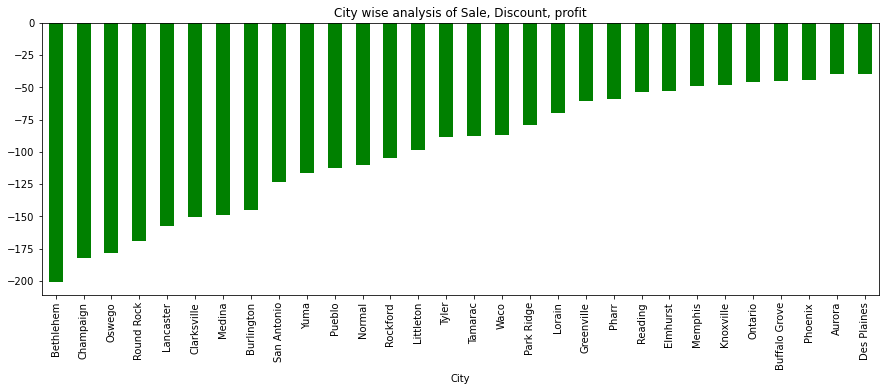

In [40]:
# 1.Low Profit
df_city['Profit'].head(30).plot(kind='bar',figsize=(15,5),color = 'green')
plt.title('City wise analysis of Sale, Discount, profit')

Text(0.5, 1.0, 'City wise analysis of Sale, Discount, profit')

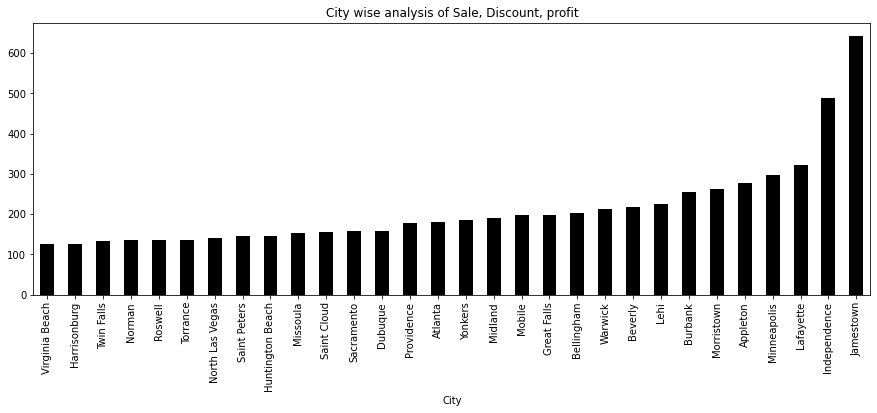

In [41]:
#2. High Profit
df_city['Profit'].tail(30).plot(kind='bar',figsize=(15,5),color = 'black')
plt.title('City wise analysis of Sale, Discount, profit')


30 CITIES WHICH HAS PROFIT IN POSITIVE

30 CITIES WHICH HAS PROFIT IN NEGATIVE

THE BALANCE IS PRETTY GOOD HERE!

### QUANTITY WISE SALES, PROFIT AND DISCOUNT ANALYSIS

In [42]:
df_quantity = df.groupby(['Quantity'])[['Sales', 'Discount', 'Profit']].mean()
df_quantity.head(10)

,Sales,Discount,Profit
Quantity,,,
1,59.234632,0.152959,8.276396
2,120.354488,0.154858,16.006831
3,175.201578,0.153329,23.667715
4,271.764059,0.157708,37.131310
5,337.936339,0.157146,40.257394
6,362.101960,0.166556,18.051517
7,395.888393,0.161980,56.579163
8,458.210802,0.171595,42.244342
9,498.083683,0.147946,68.557716


Text(0.5, 1.0, 'Quantity wise analysis of Sale, Discount, profit')

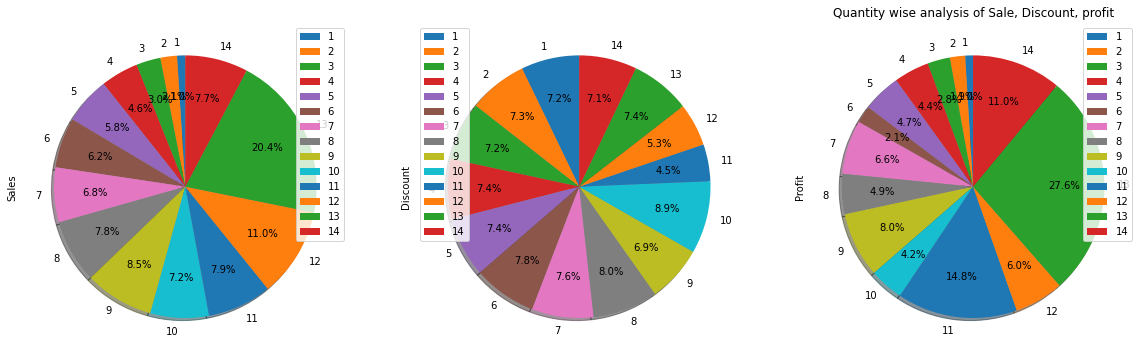

In [43]:

#1. sales 2. Discount 3. Profit
df_quantity.plot.pie(subplots=True, 
                    autopct='%1.1f%%',
                    figsize=(20, 20),
                     pctdistance=0.69,
                    startangle=90,     # start angle 90° (Africa)
                    shadow=True,
                    labels = df_quantity.index)
plt.title('Quantity wise analysis of Sale, Discount, profit')

13 Number of Quantity is high for sales and Profit.

### CATAGORY WISE SALES DISCOUNT AND PROFIT

In [45]:
df_category = df.groupby(['Category'])[['Sales', 'Discount', 'Profit']].mean()
df_category

,Sales,Discount,Profit
Category,,,
Furniture,349.834887,0.173923,8.699327
Office Supplies,119.324101,0.157285,20.327050
Technology,452.709276,0.132323,78.752002


C:\Users\CC132\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


array([<AxesSubplot:ylabel='Sales'>, <AxesSubplot:ylabel='Discount'>,
       <AxesSubplot:ylabel='Profit'>], dtype=object)

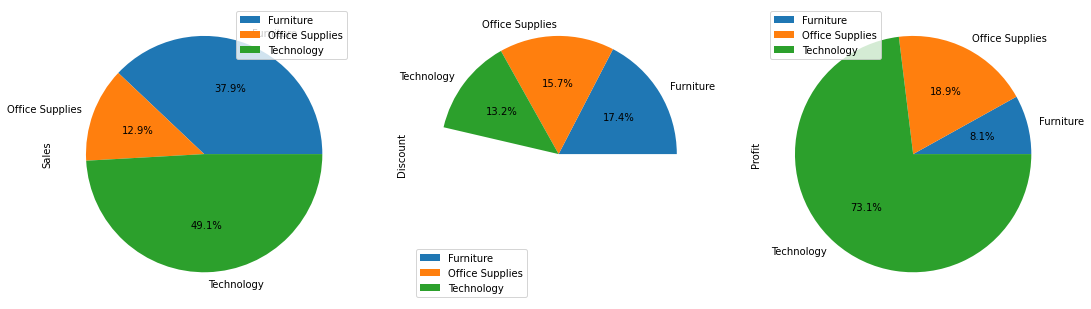

In [46]:

df_category.plot.pie(subplots=True, 
                     figsize=(18, 20), 
                     autopct='%1.1f%%', 
                     labels = df_category.index)

* Maximun sales and Profit obtain in Technology.
* Minimun profit obtain in Furniture


### Sub-Category wise Sales, Profit and Discount

In [47]:
df_sub_category = df.groupby(['Sub-Category'])[['Sales', 'Discount', 'Profit']].mean()
df_sub_category.head(10)

,Sales,Discount,Profit
Sub-Category,,,
Accessories,215.974604,0.078452,54.111788
Appliances,230.755710,0.166524,38.922758
Art,34.068834,0.074874,8.200737
Binders,133.560560,0.372292,19.843574
Bookcases,503.859633,0.211140,-15.230509
Chairs,532.332420,0.170178,43.095894
Copiers,2198.941618,0.161765,817.909190
Envelopes,64.867724,0.080315,27.418019
Fasteners,13.936774,0.082028,4.375660



#### [1] BASED ON THE SALES

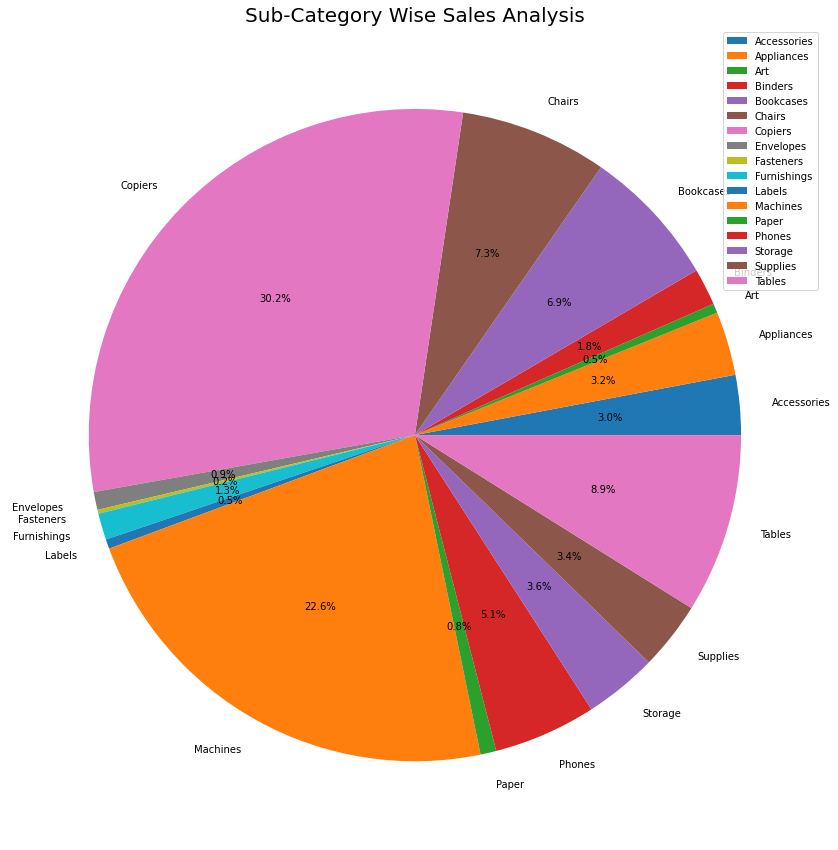

In [48]:
plt.figure(figsize = (15,15))
plt.pie(df_sub_category['Sales'], labels = df_sub_category.index, autopct = '%1.1f%%')
plt.title('Sub-Category Wise Sales Analysis', fontsize = 20)
plt.legend()
plt.xticks(rotation = 90)
plt.show()


**Copier then Machine have High sales**


#### [2] BASED ON THE DISCOUNT

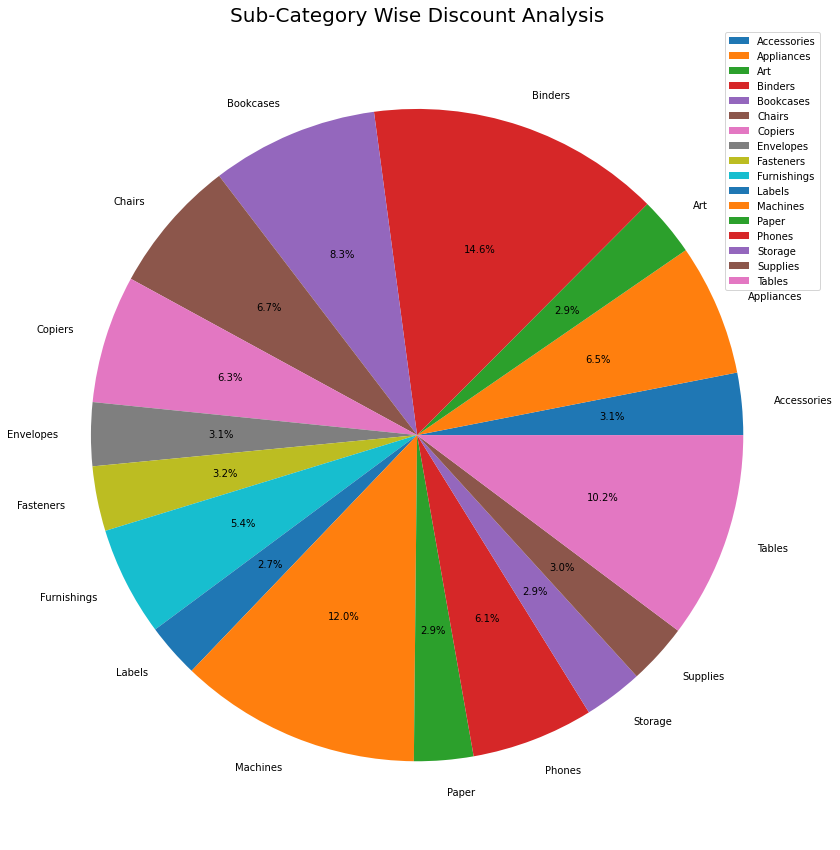

In [49]:
plt.figure(figsize = (15,15))
plt.pie(df_sub_category['Discount'], labels = df_sub_category.index, autopct = '%1.1f%%')
plt.title('Sub-Category Wise Discount Analysis', fontsize = 20)
plt.legend()
plt.xticks(rotation = 90)
plt.show()


**Binders , Machines and then tables have high Discount**


#### [3] BASED ON THE PROFIT

<AxesSubplot:xlabel='Sub-Category'>

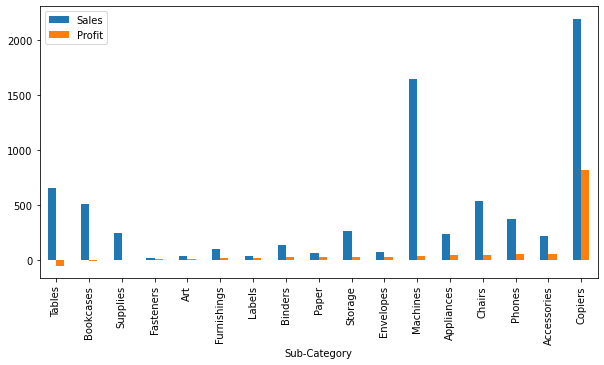

In [50]:
df_sub_category.sort_values('Profit')[['Sales','Profit']].plot(kind='bar',
                                                              figsize= (10,5),
                                                              label=['Avg Sales Price($)','Profit($)'])


COPIER : HIGHEST PROFIT AS WELL AS SELL

### REGION WISE ANALYSIS

In [51]:
df_region = df.groupby(['Region'])[['Sales', 'Discount', 'Profit']].mean()
df_region

,Sales,Discount,Profit
Region,,,
Central,215.772661,0.240353,17.092709
East,238.336110,0.145365,32.135808
South,241.803645,0.147253,28.857673
West,226.493233,0.109335,33.849032


C:\Users\CC132\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


array([<AxesSubplot:ylabel='Sales'>, <AxesSubplot:ylabel='Discount'>,
       <AxesSubplot:ylabel='Profit'>], dtype=object)

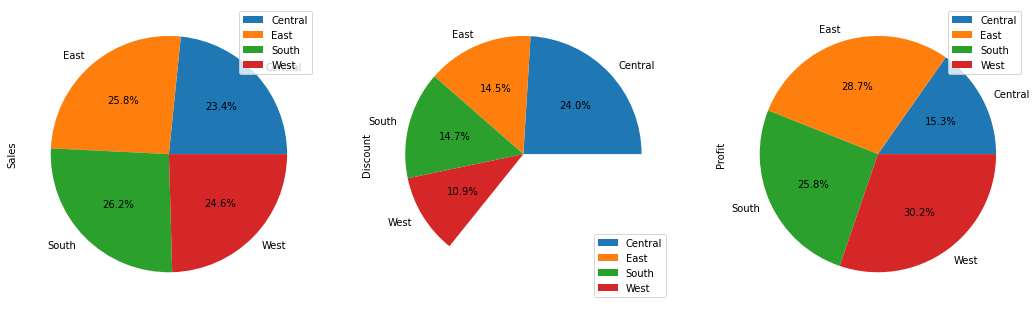

In [52]:
df_region.plot.pie(subplots=True, 
                   figsize=(18, 20), 
                   autopct='%1.1f%%',
                   labels = df_region.index)


*WEST : PROFIT IS HIGH*

### SHIP MODE WISE ANALYSIS

In [55]:
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [56]:
df_shipmode = df.groupby(['Ship Mode'])[['Sales', 'Discount', 'Profit']].mean()

C:\Users\CC132\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


array([<AxesSubplot:ylabel='Sales'>, <AxesSubplot:ylabel='Discount'>,
       <AxesSubplot:ylabel='Profit'>], dtype=object)

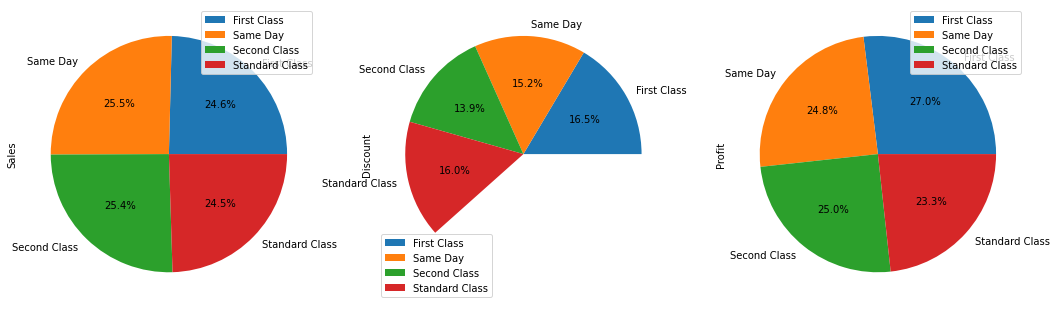

In [57]:
df_shipmode.plot.pie(subplots=True,
                     figsize=(18, 20), 
                     autopct='%1.1f%%', 
                     labels = df_shipmode.index)

* Profit and Discount is high in First Class
* Sales is high for Same day ship

### RESULT AND CONCLUSION

* Profit is more than that of sale but there are some areas where profit could be increased.

* Profit and Discount is high in First Class

* Sales is high for Same day ship

* Sub-category: Copier: High Profit & sales

* Sub-category: Binders , Machines and then tables have high Discount.

* Category: Maximun sales and Profit obtain in Technology.

* Category: Minimun profit obtain in Furniture

* State: Vermont: Highest Profit

* State: Ohio: Lowest Profit

* Segment: Home-office: High Profit & sales

* Here is top 3 city where deals are Highest.

1. New York City

2. Los Angeles

3. Philadelphia

* Sales and Profit are Moderately Correlated.

* Quantity and Profit are less Moderately Correlated.

* Discount and Profit are Negatively Correlated

* Here is top 3 state where deals are Highest.

1. Califonia

1. New York

1. Texas

* Wyoming : Lowest Number of deal,Highest amount of sales= Wyoming(11.8%)

* Lowest amount of sales= South Dakota(0.8%)

#### THANK YOU!